In [9]:

import pandas as pd
import numpy as np
import re
import os
import glob
import bs4
import re
import sys
sys.path.append("../")
from scripts.oldlistings import get_oldlistings_page
import json
from tqdm import tqdm

In [4]:
data_list = []
for i in range(1,6):
    template = f"../data/landing/oldlistings_rent_{i}.json"
    data_list.append(template)
    

In [5]:
data_list

['../data/landing/oldlistings_rent_1.json',
 '../data/landing/oldlistings_rent_2.json',
 '../data/landing/oldlistings_rent_3.json',
 '../data/landing/oldlistings_rent_4.json',
 '../data/landing/oldlistings_rent_5.json']

In [8]:
data.iloc[0]

lat                                                      -37.81373
lng                                                      144.95558
rented_prices    [{'date': 'August 2023', 'price': '$800 per we...
address                         201/560 LONSDALE STREET, MELBOURNE
meta_data        [{'label': 'bed', 'description': 'Bed', 'quant...
Name: 0, dtype: object

In [6]:
for k in data_list:
    data = pd.read_json(k)
    labels = []
    for i in range(len(data)):
        for j in data.iloc[i]["meta_data"]:
            if j["label"] not in labels:
                labels.append(j["label"])
                print(labels)



['bed']
['bed', 'bath']
['bed', 'bath', 'car']
['bed', 'bath', 'car', 'land']
['bed', 'bath', 'car', 'land', 'type']
['bed']
['bed', 'bath']
['bed', 'bath', 'car']
['bed', 'bath', 'car', 'land']
['bed', 'bath', 'car', 'land', 'type']
['bed']
['bed', 'bath']
['bed', 'bath', 'car']
['bed', 'bath', 'car', 'type']
['bed', 'bath', 'car', 'type', 'land']
['bed']
['bed', 'bath']
['bed', 'bath', 'car']
['bed', 'bath', 'car', 'type']
['bed', 'bath', 'car', 'type', 'land']
['bed']
['bed', 'bath']
['bed', 'bath', 'car']
['bed', 'bath', 'car', 'type']
['bed', 'bath', 'car', 'type', 'land']


In [21]:

# create a new dataframe that contains the unique labels as columns
rental_df = pd.DataFrame(columns=labels)

# add new columns lat, lng, address and rented price to the new dataframe
rental_df["lat"] = rental_df["lng"] = rental_df["address"] = rental_df["rented_price"] = rental_df["date"] = np.nan
k = 0
data = pd.read_json(data_list[k])
pattern1 = r"\$(\d+)\s*(per week|pw)" 
for i in tqdm(range(len(data))): 
    tmp_df = pd.DataFrame(columns=labels)
    tmp_df["lat"] = tmp_df["lng"] = tmp_df["address"] = tmp_df["rented_price"] = tmp_df["date"] = np.nan
    current_row = data.iloc[i]
    for j in current_row["rented_prices"]:
        current_rental = j
        result = re.search(pattern1, current_rental["price"])
        
        if result:

            new_row = {
                "date": current_rental["date"],
                "lat": current_row["lat"],
                "lng": current_row["lng"],
                "address": current_row["address"],
                "rented_price": result.group(1)
            }

            # Add meta_data information to the new_row dictionary
            for k in current_row["meta_data"]:
                new_row[k["label"]] = k["quantity"]

            # Convert the dictionary to a DataFrame and append to rental_df
            
            tmp_df = pd.concat([tmp_df, pd.DataFrame([new_row])], ignore_index=True)

            
    rental_df = pd.concat([rental_df,tmp_df], ignore_index=True)
print("one file done")
           
# drop duplicates
rental_df.drop_duplicates(inplace=True)
# Final shape of rental_df
print(rental_df.shape)

# drop the columns that is nan in bed
rental_df.dropna(subset=["bed","bath"], inplace=True)


# replace nan with string unit for the type column
rental_df["type"].fillna("unit", inplace=True)

# replace nan with 0 for the columns that contain the quantity of the label
rental_df.fillna(0, inplace=True)


100%|██████████| 269174/269174 [1:24:47<00:00, 52.91it/s]


one file done
(498602, 10)


C:\Users\Richard\AppData\Local\Temp\ipykernel_3188\1630548937.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rental_df["type"].fillna("unit", inplace=True)


In [23]:
rental_df.to_csv("../data/raw/rental_data_1.csv", index=False)

In [24]:
# create a new dataframe that contains the unique labels as columns
rental_df_2 = pd.DataFrame(columns=labels)

# add new columns lat, lng, address and rented price to the new dataframe
rental_df_2["lat"] = rental_df_2["lng"] = rental_df_2["address"] = rental_df_2["rented_price"] = rental_df_2["date"] = np.nan
k = 1
data = pd.read_json(data_list[k])
pattern1 = r"\$(\d+)\s*(per week|pw)" 
for i in tqdm(range(len(data))): 
    tmp_df = pd.DataFrame(columns=labels)
    tmp_df["lat"] = tmp_df["lng"] = tmp_df["address"] = tmp_df["rented_price"] = tmp_df["date"] = np.nan
    current_row = data.iloc[i]
    for j in current_row["rented_prices"]:
        current_rental = j
        result = re.search(pattern1, current_rental["price"])
        
        if result:

            new_row = {
                "date": current_rental["date"],
                "lat": current_row["lat"],
                "lng": current_row["lng"],
                "address": current_row["address"],
                "rented_price": result.group(1)
            }

            # Add meta_data information to the new_row dictionary
            for k in current_row["meta_data"]:
                new_row[k["label"]] = k["quantity"]

            # Convert the dictionary to a DataFrame and append to rental_df_2
            
            tmp_df = pd.concat([tmp_df, pd.DataFrame([new_row])], ignore_index=True)

            
    rental_df_2 = pd.concat([rental_df_2,tmp_df], ignore_index=True)
print("one file done")
           
# drop duplicates
rental_df_2.drop_duplicates(inplace=True)
# Final shape of rental_df_2
print(rental_df_2.shape)

# drop the columns that is nan in bed
rental_df_2.dropna(subset=["bed","bath"], inplace=True)


# replace nan with string unit for the type column
rental_df_2["type"].fillna("unit", inplace=True)

# replace nan with 0 for the columns that contain the quantity of the label
rental_df_2.fillna(0, inplace=True)


100%|██████████| 539055/539055 [5:43:48<00:00, 26.13it/s]  


one file done
(993086, 10)


C:\Users\Richard\AppData\Local\Temp\ipykernel_3188\1407688030.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rental_df_2["type"].fillna("unit", inplace=True)


In [27]:
# find the type of each column


# convert the columns to the correct data type
rental_df_2["lat"] = rental_df_2["lat"].astype(float)
rental_df_2["lng"] = rental_df_2["lng"].astype(float)
rental_df_2["rented_price"] = rental_df_2["rented_price"].astype(int)
rental_df_2["date"] = pd.to_datetime(rental_df_2["date"])
rental_df_2["bed"] = rental_df_2["bed"].astype(float)
rental_df_2["bath"] = rental_df_2["bath"].astype(float)
rental_df_2["car"] = rental_df_2["car"].astype(int)
rental_df_2["land"] = rental_df_2["land"].astype(str)
rental_df_2["type"] = rental_df_2["type"].astype(str)

In [28]:
rental_df_2.to_csv("../data/raw/rental_data_2.csv", index=False)

In [132]:
# find the type of each column


# convert the columns to the correct data type
rental_df["lat"] = rental_df["lat"].astype(float)
rental_df["lng"] = rental_df["lng"].astype(float)
rental_df["rented_price"] = rental_df["rented_price"].astype(int)
rental_df["date"] = pd.to_datetime(rental_df["date"])
rental_df["bed"] = rental_df["bed"].astype(int)
rental_df["bath"] = rental_df["bath"].astype(int)
rental_df["car"] = rental_df["car"].astype(int)
rental_df["land"] = rental_df["land"].astype(str)
rental_df["type"] = rental_df["type"].astype(str)

C:\Users\Richard\AppData\Local\Temp\ipykernel_23852\3783630191.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rental_df["date"] = pd.to_datetime(rental_df["date"])


Text(0.5, 0, 'Number of Bedrooms')

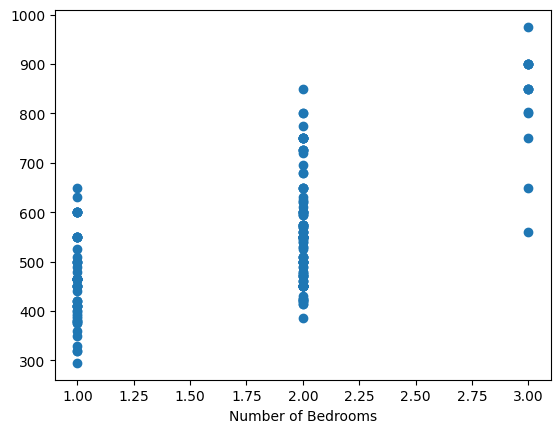

In [122]:
# plot the graph of rented price vs number of bedrooms
import matplotlib.pyplot as plt
plt.scatter(rental_df["bed"], rental_df["rented_price"])
plt.xlabel("Number of Bedrooms")

In [4]:
data.iloc[0]["meta_data"]

[{'label': 'bed', 'description': 'Bed', 'quantity': '2'},
 {'label': 'bath', 'description': 'Bath', 'quantity': '2'},
 {'label': 'car', 'description': 'Car', 'quantity': '1'}]

In [3]:
data.iloc[0]["rented_prices"]

[{'date': 'August 2024', 'price': '$800 per week'},
 {'date': 'July 2018', 'price': '$470'},
 {'date': 'July 2018', 'price': '$470 per week'},
 {'date': 'August 2014', 'price': '$450 per week'},
 {'date': 'August 2014', 'price': '$450 pw'},
 {'date': 'July 2013', 'price': '$430 per week'},
 {'date': 'July 2013', 'price': '$430 pw'},
 {'date': 'July 2013', 'price': '$460 per week'},
 {'date': 'July 2013', 'price': '$460 pw'},
 {'date': 'June 2013', 'price': '$460 per week'},
 {'date': 'April 2013', 'price': '$460 per week'},
 {'date': 'April 2013', 'price': '$460 pw'},
 {'date': 'January 2012', 'price': '$450 pw'}]

In [6]:
# extract the date and the price from the rented prices
rented_prices = data["rented_prices"].apply(pd.Series)
rented_prices


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,"{'date': 'August 2024', 'price': '$800 per week'}","{'date': 'July 2018', 'price': '$470'}","{'date': 'July 2018', 'price': '$470 per week'}","{'date': 'August 2014', 'price': '$450 per week'}","{'date': 'August 2014', 'price': '$450 pw'}","{'date': 'July 2013', 'price': '$430 per week'}","{'date': 'July 2013', 'price': '$430 pw'}","{'date': 'July 2013', 'price': '$460 per week'}","{'date': 'July 2013', 'price': '$460 pw'}","{'date': 'June 2013', 'price': '$460 per week'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date': 'August 2024', 'price': 'POA'}","{'date': 'November 2022', 'price': 'POA'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date': 'August 2024', 'price': 'POA'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date': 'August 2024', 'price': '$640 Week'}","{'date': 'June 2024', 'price': '$640'}","{'date': 'May 2023', 'price': '$575'}","{'date': 'February 2022', 'price': '$450'}","{'date': 'September 2021', 'price': '$450'}","{'date': 'August 2014', 'price': '$550 pw'}","{'date': 'February 2013', 'price': '$550 pw'}","{'date': 'July 2012', 'price': '$600 pw'}","{'date': 'May 2011', 'price': '$600'}","{'date': 'May 2011', 'price': '$600 pw'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date': 'August 2024', 'price': '$800 per week'}","{'date': 'September 2019', 'price': '$560 p.w.'}","{'date': 'September 2019', 'price': '$560 per ...","{'date': 'June 2019', 'price': '$560'}","{'date': 'April 2018', 'price': '$550 per week'}","{'date': 'April 2018', 'price': '$550'}","{'date': 'May 2017', 'price': '$540 per week'}","{'date': 'August 2014', 'price': '$500 per week'}","{'date': 'August 2009', 'price': '$470 pw'}","{'date': 'June 2009', 'price': '$490 pw'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'date': 'August 2024', 'price': '$725 per week'}","{'date': 'December 2022', 'price': '$695 per w...","{'date': 'May 2021', 'price': '$650 per week'}","{'date': 'November 2011', 'price': '$650 Weekly'}",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'date': 'August 2024', 'price': '$720 per week'}","{'date': 'September 2019', 'price': '$450 per ...","{'date': 'July 2019', 'price': '$500'}","{'date': 'February 2018', 'price': '$470 per w...","{'date': 'February 2018', 'price': '$470'}","{'date': 'November 2016', 'price': '$450 per w...","{'date': 'January 2016', 'price': '$450 per we...","{'date': 'October 2015', 'price': '$450 per we...","{'date': 'November 2015', 'price': '$450 per w...","{'date': 'February 2015', 'price': '$450 per w...",...,"{'date': 'January 2010', 'price': '$415 per we...","{'date': 'October 2007', 'price': 'Contact'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"{'date': 'August 2024', 'price': '$700 - $3,04...","{'date': 'May 2011', 'price': '$560 per week'}","{'date': 'August 2009', 'price': '$560 p.w'}","{'date': 'December 2007', 'price': '$540 p.w'}",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"{'date': 'August 2024', 'price': '$1,350 pw'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"{'date': 'August 2024', 'price': '$725 per week'}","{'date': 'August 2022', 'price': '$575 per week'}","{'date': 'August 2022', 'price': '$575'}","{'date': 'June 2021', 'price': '$450 per week'}","{'date': 'June 2021', 'price': '$450'}","{'date': 'June 2021', 'price': '$475 per week'}","{'date': 'May 2021', 'price': '$475'}","{'date': 'April 2021', 'price': '$475 per week'}","{'date': 'February 2021', 'price': '$550 per w...","{'date': 'February 2021', 'price': '$550'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 